In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers
import numpy as np


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print("Number of training examples:", len(train_images))
print("Number of testing examples:", len(test_images))
print("Number of unique labels:", len(set(train_labels)))
print("Original train_labels shape:", train_labels.shape)

Number of training examples: 60000
Number of testing examples: 10000
Number of unique labels: 10
Original train_labels shape: (60000,)


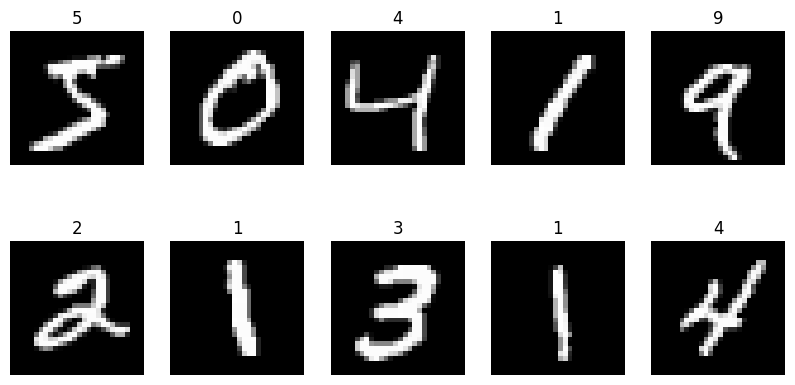

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
print("Train images shape after reshaping:", train_images.shape)
print("Test images shape after reshaping:", test_images.shape)

Train images shape after reshaping: (60000, 784)
Test images shape after reshaping: (10000, 784)


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("Train labels shape after one-hot encoding:", train_labels.shape)
print("Test labels shape after one-hot encoding:", test_labels.shape)

Train labels shape after one-hot encoding: (60000, 10)
Test labels shape after one-hot encoding: (10000, 10)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8765 - loss: 0.4331
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9648 - loss: 0.1194
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9784 - loss: 0.0729
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9848 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9891 - loss: 0.0370


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0758
Test accuracy: 0.98089998960495
